In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline
#pd.set_option('display.max_rows', 400)

In [2]:
#load and concatenate those datasets via pandas

test_data = pd.read_csv('heart_test.csv')
train_data = pd.read_csv('heart_train.csv')

data = pd.concat([test_data, train_data]).reset_index().drop('index', axis=1)

In [3]:
#print first rows from the dataset

data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
2,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
3,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
4,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
5,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
6,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
7,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
8,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
9,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0


In [4]:
#print the dataset size

data.shape

(303, 14)

In [5]:
#print dtypes of columns

data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
#find numeric columns

{feature:data[feature].unique() for feature in data}

{'age': array([57, 67, 46, 60, 50, 70, 56, 62, 59, 53, 45, 63, 54, 42, 51, 65, 49,
        41, 35, 43, 71, 48, 66, 44, 52, 58, 61, 39, 69, 55, 47, 64, 40, 68,
        38, 76, 77, 37, 34, 74, 29]),
 'sex': array([1, 0]),
 'cp': array([0, 2, 1, 3]),
 'trestbps': array([150, 125, 140, 160, 120, 170, 142, 138, 144, 148, 110, 130, 145,
        118, 122, 126, 115, 112, 164, 128, 108, 152, 100, 134,  94, 105,
        124, 102, 101, 135, 132, 104, 172, 178, 136, 106, 146, 180, 192,
        165, 174, 114, 117, 200, 156, 123, 154, 155, 129]),
 'chol': array([276, 254, 311, 185, 233, 269, 240, 268, 178, 288, 226, 236, 200,
        195, 201, 244, 175, 264, 417, 149, 294, 235, 177, 286, 282, 303,
        206, 176, 245, 302, 253, 330, 258, 290, 212, 192, 564, 204, 186,
        209, 309, 300, 237, 183, 248, 234, 321, 298, 229, 271, 267, 283,
        354, 239, 270, 266, 246, 205, 335, 265, 228, 227, 223, 243, 255,
        284, 409, 273, 199, 308, 208, 263, 219, 249, 325, 187, 275, 172,
        318, 19

In [7]:
#analyze values distribution for each numerical column

boolean_columns = [1, 5, 8, 13]
categorial_columns = [2, 6, 10, 11, 12]
numerical_columns = [0, 3, 4, 7, 9, ]

numeric_data = data.loc[:, data.columns[numerical_columns]]
data.columns[numerical_columns]

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

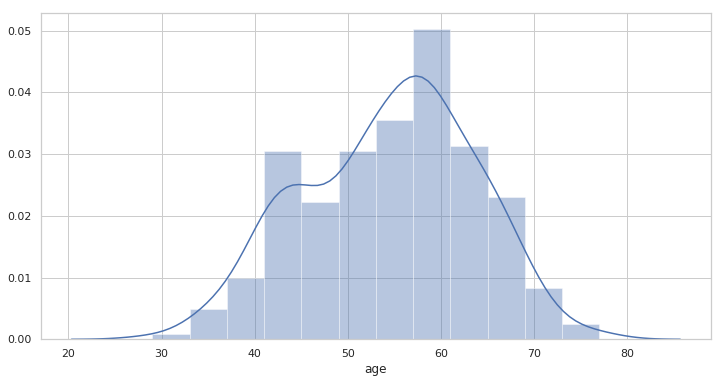

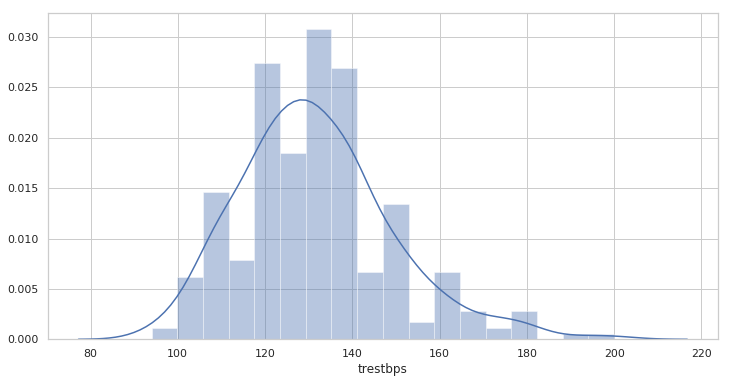

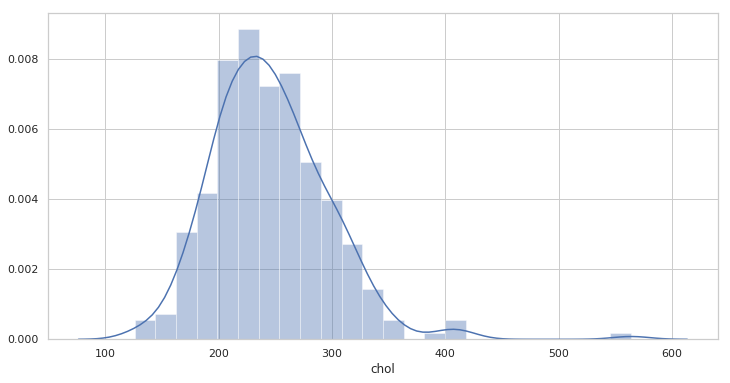

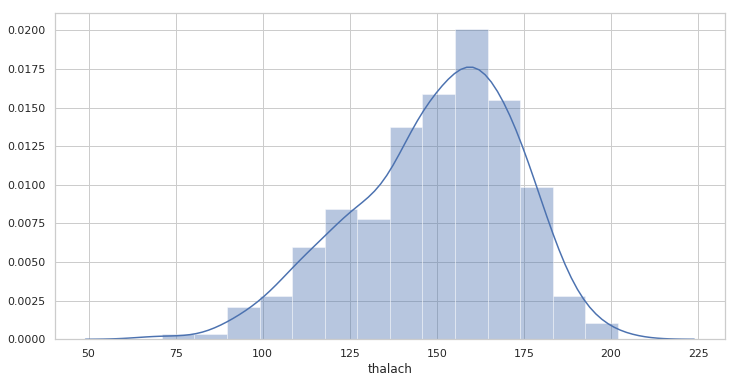

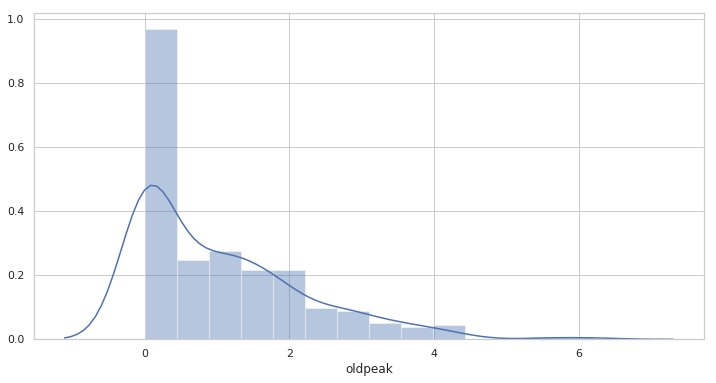

In [43]:
for col in data.columns[numerical_columns].values:
    plt.figure(figsize=(12, 6))
    sns.distplot(numeric_data[col])

In [8]:
#analyze frequency distribution of values for each categorical and boolean columns

categorial_data = data.loc[:, data.columns[categorial_columns]]
data.columns[categorial_columns]

Index(['cp', 'restecg', 'slope', 'ca', 'thal'], dtype='object')

In [9]:
boolean_data = data.loc[:, data.columns[boolean_columns]]
data.columns[boolean_columns]

Index(['sex', 'fbs', 'exang', 'target'], dtype='object')

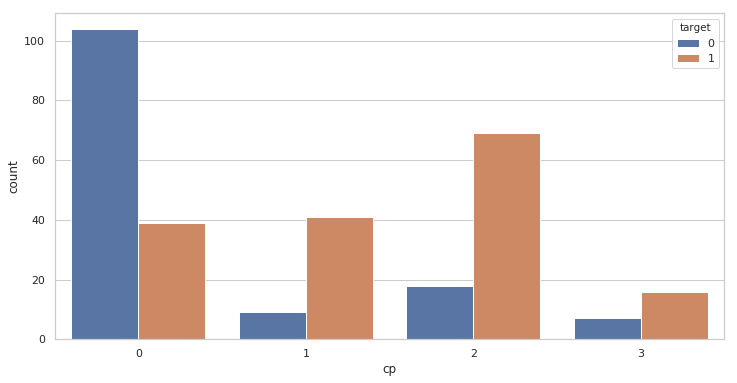

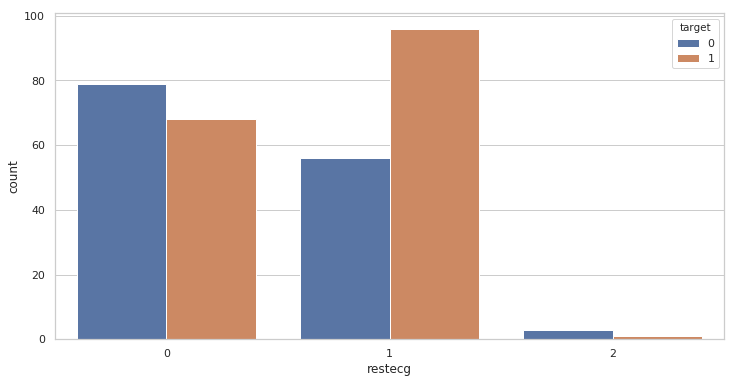

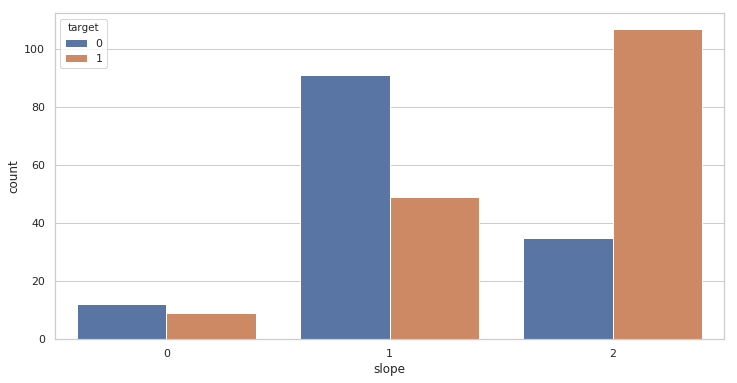

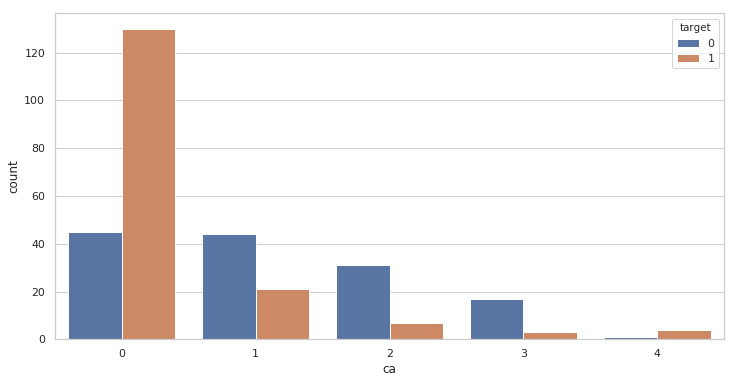

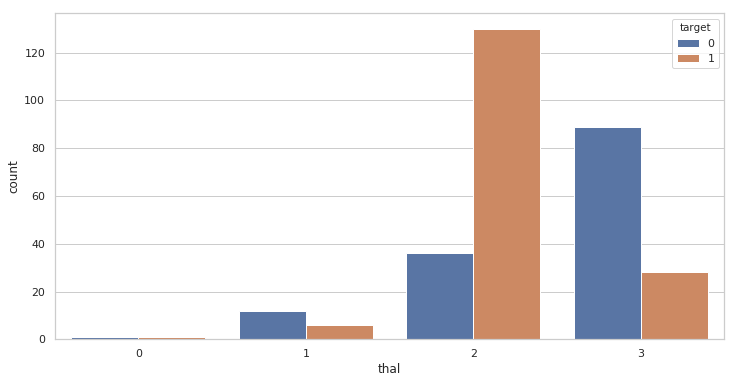

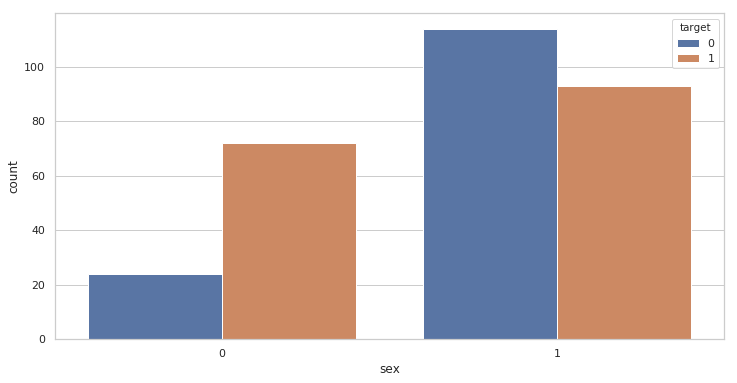

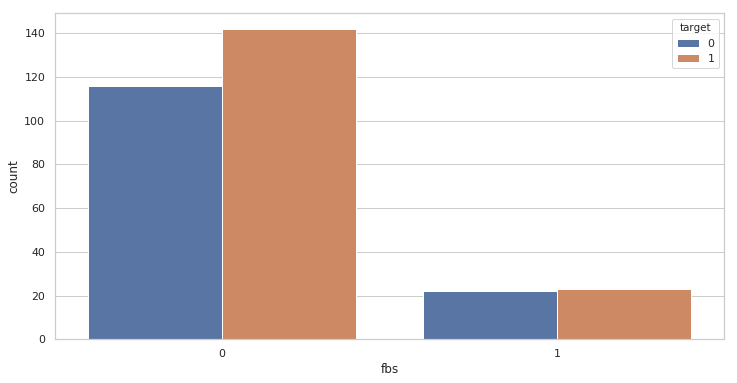

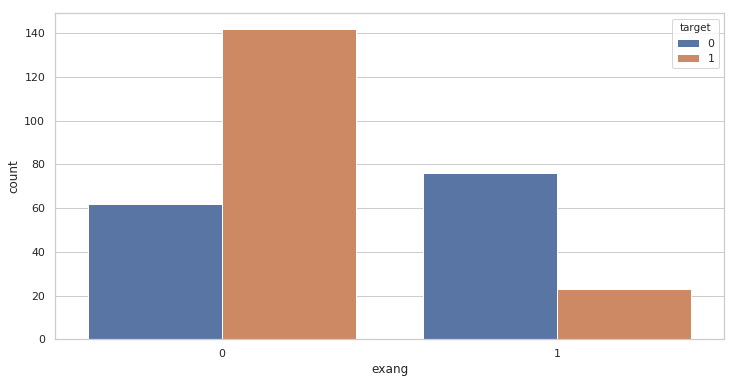

In [47]:
for col in data.columns[categorial_columns + boolean_columns].values[:-1]:
    plt.figure(figsize=(12, 6))
    sns.countplot(col, data=data, hue='target')

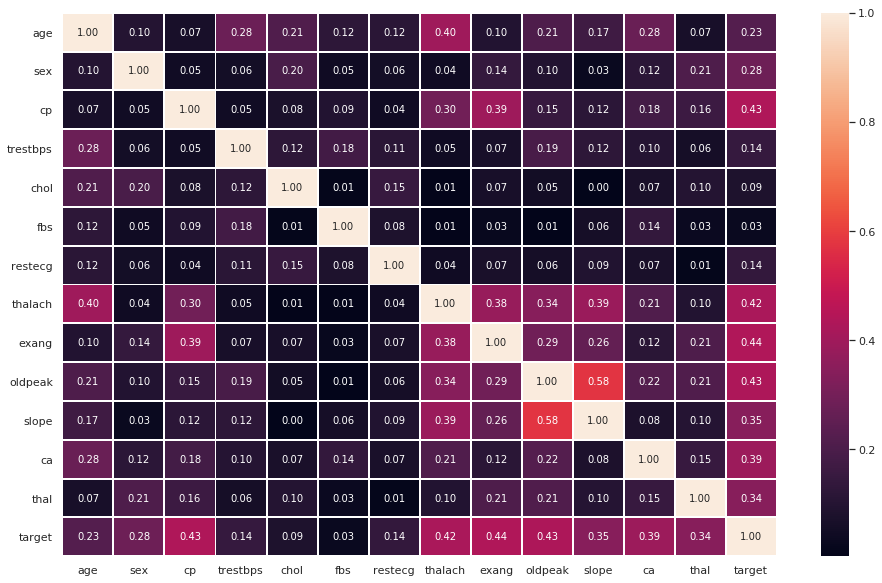

In [10]:
# Draw a heatmap with the numeric values in each cell

f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(data.corr().abs(), annot=True, fmt='.2f', linewidths=1., ax=ax)

In [ ]:
# As we can see columns ['cp', 'thalach', 'exang', 'oldpeak'] correlate with others, 
# especially ['oldpeak'], so it makes sence to check their importance in first place

In [13]:
#perform preprocessing

y = data.target

X = data.drop('target', axis=1)

print(X.columns)
print(categorial_columns)

X.cp = X.cp.astype(object)
X.restecg = X.restecg.astype(object)
X.slope = X.slope.astype(object)
X.ca = X.ca.astype(object)
X.thal = X.thal.astype(object)

X = pd.get_dummies(X)
X

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[2, 6, 10, 11, 12]


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,57,1,150,276,0,112,1,0.6,1,0,...,0,0,1,0,0,0,0,1,0,0
1,67,1,125,254,1,163,0,0.2,1,0,...,0,0,0,1,0,0,0,0,0,1
2,46,1,140,311,0,120,1,1.8,1,0,...,0,0,0,1,0,0,0,0,0,1
3,60,1,140,185,0,155,0,3.0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,50,1,140,233,0,163,0,0.6,0,0,...,0,0,1,0,0,0,0,0,0,1
5,70,1,160,269,0,112,1,2.9,0,0,...,0,0,1,0,0,0,0,0,0,1
6,56,1,120,240,0,169,0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,62,0,140,268,0,160,0,3.6,1,0,...,0,0,0,1,0,0,0,0,1,0
8,60,0,120,178,1,96,0,0.0,0,0,...,1,1,0,0,0,0,0,0,1,0
9,59,1,170,288,0,159,0,0.2,0,0,...,0,1,0,0,0,0,0,0,0,1


In [14]:
from sklearn import preprocessing

X.iloc[:, numerical_columns] = preprocessing.normalize(X.iloc[:, numerical_columns])
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.202253,1,150,0.979331,0.000000,112,1,0.002129,1,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,0.255053,1,125,0.966919,0.003807,163,0,0.000761,1,0.000000,...,0,0,0,1,0,0,0,0,0,1
2,0.146316,1,140,0.989221,0.000000,120,1,0.005725,1,0.000000,...,0,0,0,1,0,0,0,0,0,1
3,0.308468,1,140,0.951110,0.000000,155,0,0.015423,0,0.000000,...,0,1,0,0,0,0,0,0,1,0
4,0.209815,1,140,0.977738,0.000000,163,0,0.002518,0,0.000000,...,0,0,1,0,0,0,0,0,0,1
5,0.251822,1,160,0.967717,0.000000,112,1,0.010433,0,0.000000,...,0,0,1,0,0,0,0,0,0,1
6,0.227228,1,120,0.973833,0.000000,169,0,0.000000,0,0.004058,...,0,1,0,0,0,0,0,0,1,0
7,0.225371,0,140,0.974185,0.000000,160,0,0.013086,1,0.000000,...,0,0,0,1,0,0,0,0,1,0
8,0.319416,0,120,0.947600,0.005324,96,0,0.000000,0,0.000000,...,1,1,0,0,0,0,0,0,1,0
9,0.200693,1,170,0.979654,0.000000,159,0,0.000680,0,0.000000,...,0,1,0,0,0,0,0,0,0,1


In [15]:
import pandas_profiling as pp

pp.ProfileReport(data, title='Pandas Profiling Report')